In [1]:
import Pkg

Pkg.add("CSV")
Pkg.add("DataFrames")
Pkg.add("Plots")
Pkg.add("StatsPlots")

   Updating registry at `C:\Users\yancf\.julia\registries\General`


   Updating git-repo `https://github.com/JuliaRegistries/General.git`


  Resolving package versions...
   Updating `C:\Users\yancf\.julia\environments\v1.4\Project.toml`
 [no changes]
   Updating `C:\Users\yancf\.julia\environments\v1.4\Manifest.toml`
 [no changes]
  Resolving package versions...
   Updating `C:\Users\yancf\.julia\environments\v1.4\Project.toml`
 [no changes]
   Updating `C:\Users\yancf\.julia\environments\v1.4\Manifest.toml`
 [no changes]
  Resolving package versions...
   Updating `C:\Users\yancf\.julia\environments\v1.4\Project.toml`
 [no changes]
   Updating `C:\Users\yancf\.julia\environments\v1.4\Manifest.toml`
 [no changes]
  Resolving package versions...
   Updating `C:\Users\yancf\.julia\environments\v1.4\Project.toml`
 [no changes]
   Updating `C:\Users\yancf\.julia\environments\v1.4\Manifest.toml`
 [no changes]


In [1]:
using CSV
using DataFrames
using Plots
using StatsPlots

In [2]:
function getDataframes(method)

    df = Array{DataFrame}(undef,4)
    df[1] = DataFrames.DataFrame(CSV.File("./src/data/" * method * "/Intel(R) Core(TM) i5-7400 CPU @ 3.00GHz.csv"))
    df[2] = DataFrames.DataFrame(CSV.File("./src/data/" * method * "/Intel(R) Core(TM) i5-8265U CPU @ 1.60GHz.csv"))
    df[3] = DataFrames.DataFrame(CSV.File("./src/data/" * method * "/IntelR_CoreTM_i5-7200U_CPU__2.50GHz.csv"))
    df[4] = DataFrames.DataFrame(CSV.File("./src/data/" * method * "/AMD FX(tm)-8350 Eight-Core Processor.csv"))

    for dataframe in df
        dataframe[!, "Elapsed Time"] = dataframe[!, "Elapsed Time"] / 1000;
        dataframe[!, "KBytes"] = dataframe[!, "Length"] * 8 / 1024 # 8 Bytes -> 64 bits and 1024 B -> 1 KB
        dataframe[!, "Instructions per second"] = dataframe[!, "Num of instructions"] ./ dataframe[!, "Elapsed Time"] 
    end

    df
end

getDataframes (generic function with 1 method)

In [3]:
mergedf = getDataframes("mergesort")

4-element Array{DataFrame,1}:
 985×9 DataFrame
 Row │ Length  Elapsed Time  L1 Cache miss  L2 Cache miss  L3 Cache miss  Num  ⋯
     │ Int64   Float64       Int64          Int64          Int64          Int6 ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │   2048      0.001129           1737           2112            126       ⋯
   2 │   2176      0.001189           1494           2000             18
   3 │   2304      0.001279           1801           2086             55
   4 │   2432      0.00142            1983           2316             64
   5 │   2560      0.001436           1843           2139             58       ⋯
   6 │   2688      0.001518           2154           2444             23
   7 │   2816      0.001689           2552           2959             13
   8 │   2944      0.001676           2488           2577             59
   9 │   3072      0.001808           2787           2899             41       ⋯
  10 │   3200      0.001838  

In [4]:
quickdf = getDataframes("quicksort")

4-element Array{DataFrame,1}:
 985×9 DataFrame
 Row │ Length  Elapsed Time  L1 Cache miss  L2 Cache miss  L3 Cache miss  Num  ⋯
     │ Int64   Float64       Int64          Int64          Int64          Int6 ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │   2048      0.000421            552            975             24       ⋯
   2 │   2176      0.000495            667           1118             26
   3 │   2304      0.000485            544           1007             22
   4 │   2432      0.000506            581            975              6
   5 │   2560      0.000637           1027           1512             30       ⋯
   6 │   2688      0.000579            647           1057              6
   7 │   2816      0.000636            682           1154             12
   8 │   2944      0.000637            689           1124             13
   9 │   3072      0.000673            680           1198             11       ⋯
  10 │   3200      0.000706  

In [20]:
function GenericPlot(dfs::Array{DataFrame}, xlabel::String, ylabel::String, label::Array{String}, title::String, legend = :topleft)
    p = plot(dfs[1][!, xlabel], dfs[1][!, ylabel], xlabel=xlabel, ylabel=ylabel, label = label[1], title = title, legend = legend) 

    for i = 2:length(dfs)
        plot!(dfs[i][!, xlabel], dfs[i][!, ylabel], xlabel=xlabel, ylabel=ylabel, label = label[i], legend = legend)
    end

    p
end

GenericPlot (generic function with 2 methods)

In [6]:
labels = ["i5-7400", "i5-8265U", "i5-7200U", "FX-8350"]

4-element Array{String,1}:
 "i5-7400"
 "i5-8265U"
 "i5-7200U"
 "FX-8350"

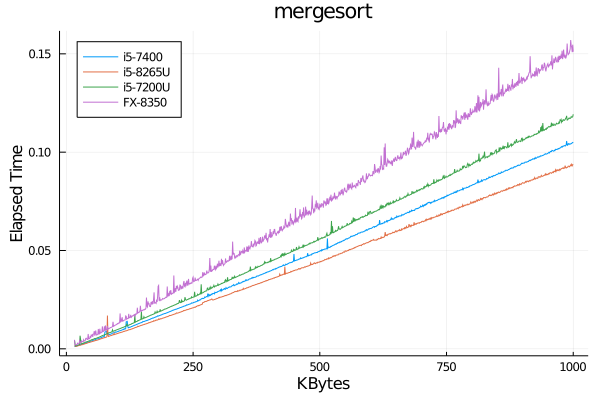

In [7]:
mTime = GenericPlot(mergedf, "KBytes", "Elapsed Time", labels, "mergesort")
savefig("graphs/ElapsedTimeMerge.png")

mTime

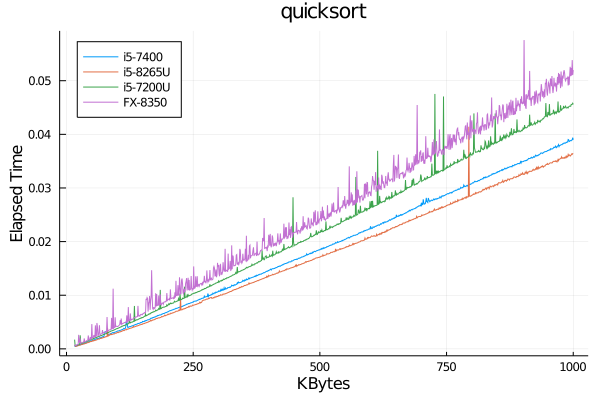

In [8]:
qTime = GenericPlot(quickdf, "KBytes", "Elapsed Time", labels, "quicksort")
savefig("graphs/ElapsedTimeQuick.png")

qTime

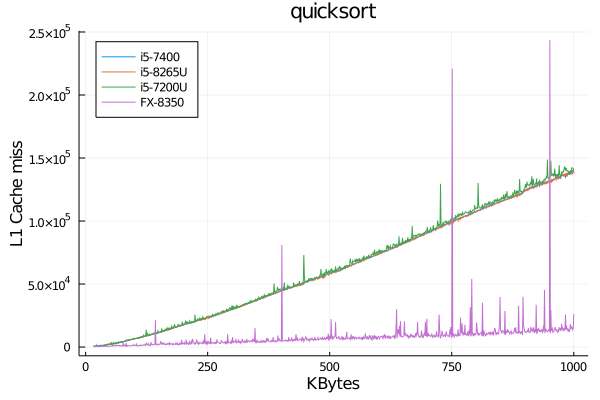

In [9]:
qL1 = GenericPlot(quickdf, "KBytes", "L1 Cache miss", labels, "quicksort")
savefig("graphs/L1Quick.png")

qL1

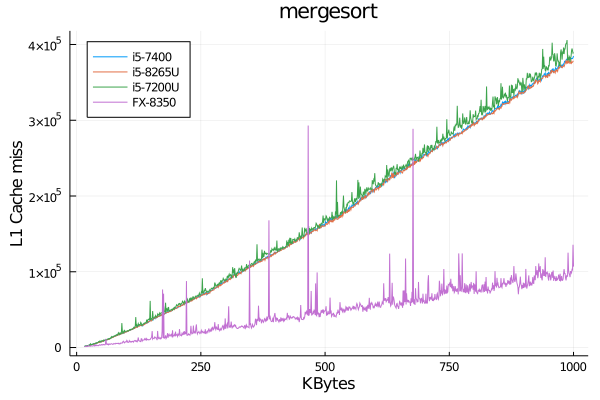

In [10]:
mL1 = GenericPlot(mergedf, "KBytes", "L1 Cache miss", labels, "mergesort")
savefig("graphs/L1Merge.png")

mL1

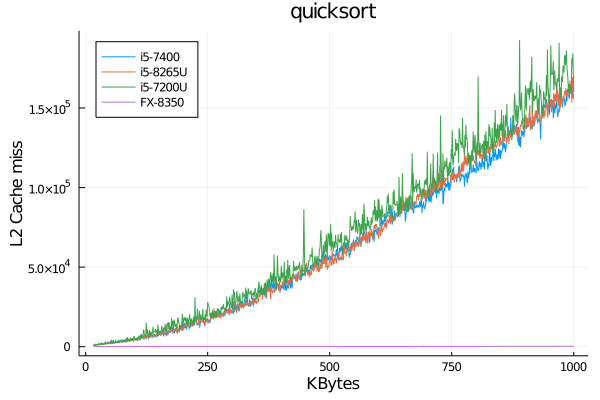

In [11]:
qL2 = GenericPlot(quickdf, "KBytes", "L2 Cache miss", labels, "quicksort")
savefig("graphs/L2Quick.png")

qL2

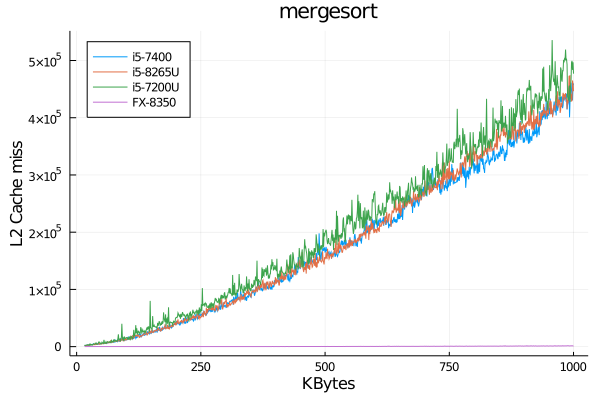

In [12]:
mL2 = GenericPlot(mergedf, "KBytes", "L2 Cache miss", labels, "mergesort")
savefig("graphs/L2Merge.png")

mL2

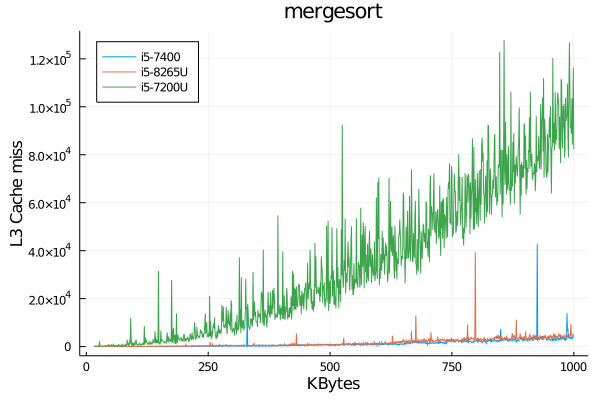

In [13]:
mL3 = GenericPlot(mergedf[1:3], "KBytes", "L3 Cache miss", ["i5-7400", "i5-8265U", "i5-7200U"], "mergesort")
savefig("graphs/L3Merge1.png")

mL3

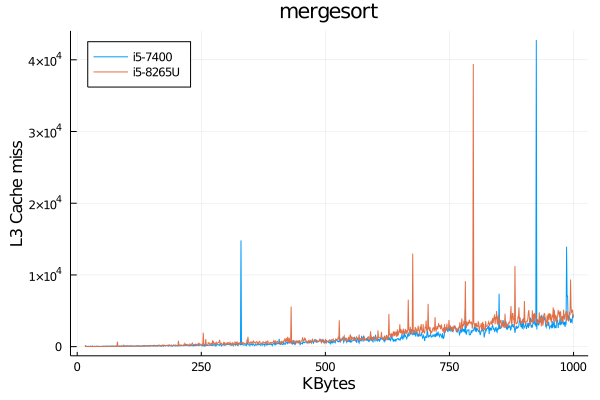

In [14]:
mL3_2 = GenericPlot(mergedf[1:2], "KBytes", "L3 Cache miss", ["i5-7400", "i5-8265U"], "mergesort")
savefig("graphs/L3Merge2.png")

mL3_2

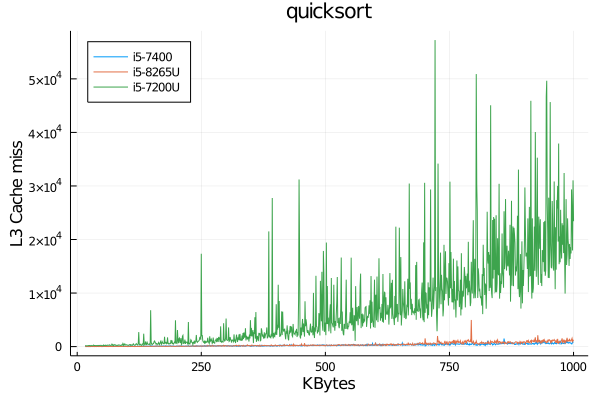

In [16]:
qL3 = GenericPlot(quickdf[1:3], "KBytes", "L3 Cache miss", ["i5-7400", "i5-8265U", "i5-7200U"], "quicksort")
savefig("graphs/L3QuickGnomoInterfaceFoda.png")

qL3

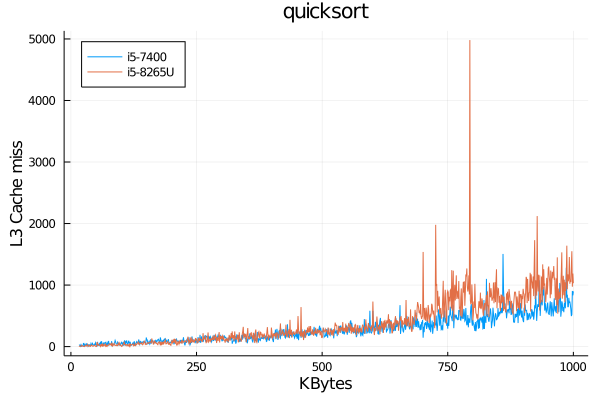

In [17]:
qL3_2 = GenericPlot(quickdf[1:2], "KBytes", "L3 Cache miss", ["i5-7400", "i5-8265U"], "quicksort")
savefig("graphs/L3Merge2.png")

qL3_2

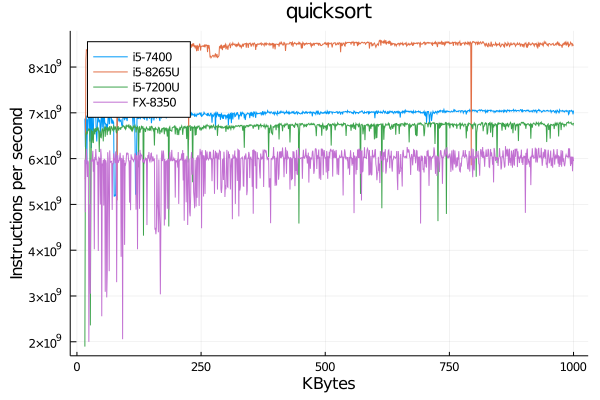

In [18]:
qN = GenericPlot(quickdf, "KBytes", "Instructions per second", labels, "quicksort", :bottomleft)
savefig("graphs/InsPerSecQuick.png")

qN

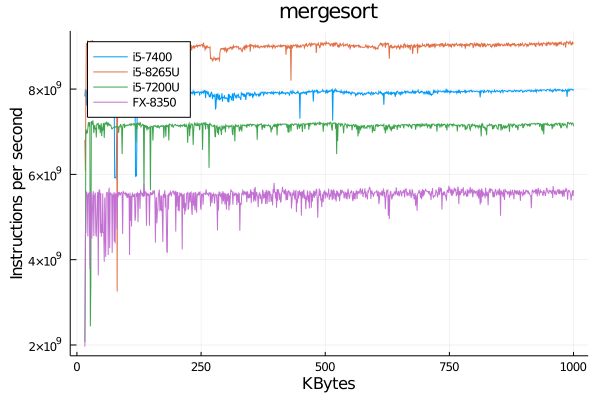

In [19]:
mN = GenericPlot(mergedf, "KBytes", "Instructions per second", labels, "mergesort")
savefig("graphs/InsPerSecMerge.png")

mN

In [84]:
names(quickdf[1])

9-element Array{String,1}:
 "Length"
 "Elapsed Time"
 "L1 Cache miss"
 "L2 Cache miss"
 "L3 Cache miss"
 "Num of instructions"
 "Total cycles"
 "KBytes"
 "Instructions per second"